# Assignment 4
## Data Science Tools I
### Professor: Don Dalton

---

### Student: Duncan Ferguson


The questions in this notebook all relate to the same sets of data, linked on the Canvas assignment page. Each question walks through various manipulations of the data, each in multiple parts. These are designed to review the topics covered in week 3 and many parts (there are some exceptions) can be answered with just one or a few lines of code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1 - Data Cleaning

## Part (a)
### 3 points

Use `pd.read_csv` to read the `cereals_data.csv` file into a DataFrame called `cereals_data`. If you are using Google Colab, uploaded files reside in the root folder `/content/`. If you are using a local file, provide the path to the file relative to the folder your notebook is in.

Print the dimensions (shape) of the data frame and output the first 5 rows to take a look at what sort of information we're dealing with.

In [2]:
cereals_data = pd.read_csv('cereals_data.csv')
cereals_data.head()

,unnamed:,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating
0,NaN,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,NaN,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,NaN,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,NaN,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,NaN,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


If you take a close look at this .csv file, you will find that some column names as well as some of the categorical values have extra whitespace on the left- and/or right-hand sides. For example, the column index `unnamed: ` has a space after the colon.

Strip the whitespace off of the column names by using `cereals_data.columns.str.strip()`. The `.str.strip()` method can be applied to values within individual columns as well. Apply this method to the columns `Name`, `Manuf`, and `Type`. (Even if you print the first 5 rows again, it may not be immediately clear if you have successfully stripped the whitespace until you start accessing particular values.)

In [3]:
# Stripping the white space from the headers. Printing test before and after
print([len(word) for word in cereals_data.columns])
cereals_data.columns = cereals_data.columns.str.strip()
print([len(word) for word in cereals_data.columns])

manuf = cereals_data['Manuf'].to_list()
print(sum([len(word) for word in manuf])/len(manuf))

# Stripping the white space from columns Name, Manuf and Type
cereals_data['Name'] = cereals_data['Name'].str.strip()
cereals_data['Manuf'] = cereals_data['Manuf'].str.strip()
cereals_data['Type'] = cereals_data['Type'].str.strip()

manuf = cereals_data['Manuf'].to_list()
print(sum([len(word) for word in manuf])/len(manuf))


[10, 4, 5, 4, 8, 7, 3, 6, 5, 5, 6, 6, 8, 5, 6, 4, 6]
[8, 4, 5, 4, 8, 7, 3, 6, 5, 5, 6, 6, 8, 5, 6, 4, 6]
2.0
1.0


## Part (b) 
### 3 points


The `unnamed:` column is not very useful, so permanently drop that column. 

Additionally, to follow the pattern of abbreviations, rename `Calories` to `Cal` and `Vitamins` to `Vit`. (This can be done in one line.) 

Again output the data frame dimensions and the first five rows to confirm these changes. Successfully performing these changes should demonstrate that the extraneous whitespace in the columns was removed.

In [4]:
cereals_data.drop(columns = ['unnamed:'], inplace=True)
cereals_data.rename(columns={"Calories":"Cal","Vitamins":"Vit"}, inplace=True)
cereals_data.head()

,Name,Manuf,Type,Cal,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vit,Shelf,Weight,Cups,Rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


## Part (c)

### 3 points


Print the unique values in the columns `Manuf`, `Type`, and `Shelf`. You should find that there are 7 unique characters for `Manuf`, 'C' and 'H' for `Type`, and 1, 2, and 3 for `Shelf`.

In [5]:
cereals_data['Manuf'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [6]:
cereals_data.Manuf.unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [7]:
cereals_data.Type.unique()

array(['C', 'H'], dtype=object)

In [8]:
cereals_data['Type'].unique()

array(['C', 'H'], dtype=object)

In [9]:
cereals_data.Shelf.unique()

array([3, 1, 2], dtype=int64)

In [10]:
cereals_data['Shelf'].unique()

array([3, 1, 2], dtype=int64)

Change the `Type` column such that it uses 'cold' and 'hot' instead of 'C' and 'H' respectively. Output the first five rows to confirm this change.

In [11]:
cereals_data["Type"].replace({"C":"Cold", "H":"Hot"}, inplace=True)
cereals_data.head()

,Name,Manuf,Type,Cal,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vit,Shelf,Weight,Cups,Rating
0,100%_Bran,N,Cold,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,Cold,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,Cold,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,Cold,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,Cold,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


# Question 2 - Indexing

## Part (a)
### 5 points

Use the `iloc` method to select the 5th and 7th rows of `cereals_data`. Note that indexes start at 0, so the 5th row, for example, is at index 4.

"Select" simply means let the notebook run this command and then output the result to the screen to view the contents.

In [12]:
cereals_data.iloc[[4, 6]]

,Name,Manuf,Type,Cal,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vit,Shelf,Weight,Cups,Rating
4,Almond_Delight,R,Cold,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
6,Apple_Jacks,K,Cold,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.0,1.00,33.174094


Now select the same two rows using the `loc` method, but additionally select the all the columns between `Type` through `Carbo`, inclusive.

In [13]:
cereals_data.loc[[4, 6], ["Type", "Carbo"]]

,Type,Carbo
4,Cold,14.0
6,Cold,11.0


Now make the exact same selection as above (with the columns from `Type` to `Carbo`), but using `iloc` once again.

In [14]:
cereals_data.iloc[[4,6],[2,8]]

,Type,Carbo
4,Cold,14.0
6,Cold,11.0


Use the square bracket syntax (not using `loc` nor `iloc`) to select the first 10 rows and the columns `Protein`, `Sodium`, and `Carbo`.

In [15]:
cereals_data[["Protein", "Sodium", "Carbo"]][:10]

,Protein,Sodium,Carbo
0,4,130,5.0
1,3,15,8.0
2,4,260,7.0
3,4,140,8.0
4,2,200,14.0
5,2,180,10.5
6,2,125,11.0
7,3,210,18.0
8,2,200,15.0
9,3,210,13.0


Use `iloc` to select the first five rows.

In [16]:
cereals_data.iloc[:6]

,Name,Manuf,Type,Cal,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vit,Shelf,Weight,Cups,Rating
0,100%_Bran,N,Cold,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,Cold,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,Cold,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,Cold,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,Cold,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
5,Apple_Cinnamon_Cheerios,G,Cold,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541


## Part (b)

### 3 points


Use boolean indexing to select the rows with a value of `Cal` greater than 100.

In [17]:
cereals_data[cereals_data['Cal'] > 100]

,Name,Manuf,Type,Cal,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vit,Shelf,Weight,Cups,Rating
1,100%_Natural_Bran,Q,Cold,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
4,Almond_Delight,R,Cold,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios,G,Cold,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,K,Cold,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,G,Cold,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
10,Cap'n'Crunch,Q,Cold,120,1,2,220,0.0,12.0,12.0,35.0,25,2,1.00,0.75,18.042851
11,Cheerios,G,Cold,110,6,2,290,2.0,17.0,1.0,105.0,25,1,1.00,1.25,50.764999
12,Cinnamon_Toast_Crunch,G,Cold,120,1,3,210,0.0,13.0,9.0,45.0,25,2,1.00,0.75,19.823573
13,Clusters,G,Cold,110,3,2,140,2.0,13.0,7.0,105.0,25,3,1.00,0.50,40.400208
14,Cocoa_Puffs,G,Cold,110,1,1,180,0.0,12.0,13.0,55.0,25,2,1.00,1.00,22.736446


Use boolean indexing again to select rows with calories greater than 120, but additionally only the rows that also meet the condition that the `Manuf` is 'K'.

In [18]:
cereals_data[(cereals_data['Cal'] > 120) & (cereals_data['Manuf'] == 'K')]

,Name,Manuf,Type,Cal,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vit,Shelf,Weight,Cups,Rating
39,Just_Right_Fruit_&_Nut,K,Cold,140,3,1,170,2.0,20.0,9.0,95.0,100,3,1.30,0.75,36.471512
46,Mueslix_Crispy_Blend,K,Cold,160,3,2,150,3.0,17.0,13.0,160.0,25,3,1.50,0.67,30.313351
49,Nutri-Grain_Almond-Raisin,K,Cold,140,3,2,220,3.0,21.0,7.0,130.0,25,3,1.33,0.67,40.692320


Select the same rows as above (calories > 120 and manufacturer being 'K'), but using the `query` method.

`query` was not covered in class, so here is a [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to the corresponding documentation. Simply put, `query` behaves just like boolean indexing, but uses a slightly more succinct syntax in string format.

In [19]:
cereals_data.query('Cal>120 & Manuf=="K"')

,Name,Manuf,Type,Cal,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vit,Shelf,Weight,Cups,Rating
39,Just_Right_Fruit_&_Nut,K,Cold,140,3,1,170,2.0,20.0,9.0,95.0,100,3,1.30,0.75,36.471512
46,Mueslix_Crispy_Blend,K,Cold,160,3,2,150,3.0,17.0,13.0,160.0,25,3,1.50,0.67,30.313351
49,Nutri-Grain_Almond-Raisin,K,Cold,140,3,2,220,3.0,21.0,7.0,130.0,25,3,1.33,0.67,40.692320


# Question 3 - Combining Data

## Part (a)

### 2 points


Read the .csv file `cereal_names.csv` as a data frame called `cereal_names` and output the first five rows.

In [20]:
cereal_names = pd.read_csv("cereal_names.csv")
cereal_names.head()

,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0


Create a new data frame called `cereals_data2` that combines (joins) `cereals_data` with `cereal_names` horizontally, placing `cereal_names` on the right. Output the first five rows and last 10 columns to confirm the resulting combined data frame. (Remember that negative indexes wrap around to the end of an array-like structure.)

In [21]:
cereals_data2 = cereals_data.join(cereal_names)
cereals_data2.iloc[:,-10:].head(5)

,Shelf,Weight,Cups,Rating,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,3,1.0,0.33,68.402973,1,0,0,0,0,0
1,3,1.0,1.00,33.983679,0,1,0,0,0,0
2,3,1.0,0.33,59.425505,0,0,1,0,0,0
3,3,1.0,0.50,93.704912,0,0,1,0,0,0
4,3,1.0,0.75,34.384843,0,0,0,0,1,0


## Part (b)

### 4 points


Read the .csv file `more_cereals_data.csv` as a data frame called `more_cereals_data`. As we did with `cereals_data.csv`, strip the column names of extraneous whitespace, and same for the columns `Name`, `Manuf`, and `Type`.

Output the first five rows to get a look at the data.

In [22]:
more_cereals_data = pd.read_csv("more_cereals_data.csv")
more_cereals_data.head()

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,Puffed_Wheat,Q,C,50,2,0,0,1.0,10.0,0.0,...,0.50,1.00,63.005645,1,0,1,0,0,0,0
1,Quaker_Oat_Squares,Q,C,100,4,1,135,2.0,14.0,6.0,...,1.00,0.50,49.511874,1,0,1,0,0,0,0
2,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,NaN,NaN,...,1.00,0.67,50.828392,0,0,1,0,0,0,0
3,Raisin_Bran,K,C,120,3,1,210,5.0,14.0,12.0,...,1.33,0.75,39.259197,1,0,0,1,0,0,0
4,Raisin_Nut_Bran,G,C,100,3,2,140,2.5,10.5,8.0,...,1.00,0.50,39.703400,1,0,0,0,1,0,0


Create a new data frame called `cereals_data3` that combines (appends) `cereals_data2` with `more_cereals_data` vertically, placing `more_cereals_data` below `cereals_data2`. To avoid duplicating indexes, make sure that indexes are ignored when appending.

Output the last 10 rows to confirm the resulting combined data frame. (You should see that `Cal`, `Vit`, `Calories`, and `Vitamins` are all present since the additional data frame did not use the abbreviated terms you applied earlier. This is an intentional result.)

In [23]:
cereals_data3 = cereals_data2.append(more_cereals_data, ignore_index=True)
cereals_data3.tail(10)

,Name,Manuf,Type,Cal,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Rating,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP,Calories,Vitamins,Cold
72,Special_K,K,C,NaN,6,0,230,1.0,16.0,3.0,...,53.131324,0,0,1,0,0,0,110.0,25.0,1.0
73,Strawberry_Fruit_Wheats,N,C,NaN,2,0,15,3.0,15.0,5.0,...,59.363993,1,0,0,0,0,0,90.0,25.0,1.0
74,Total_Corn_Flakes,G,C,NaN,2,1,200,0.0,21.0,3.0,...,38.839746,0,0,0,1,0,0,110.0,100.0,1.0
75,Total_Raisin_Bran,G,C,NaN,3,1,190,4.0,15.0,14.0,...,28.592785,0,0,0,1,0,0,140.0,100.0,1.0
76,Total_Whole_Grain,G,C,NaN,3,1,200,3.0,16.0,3.0,...,46.658844,0,0,0,1,0,0,100.0,100.0,1.0
77,Triples,G,C,NaN,2,1,250,0.0,21.0,3.0,...,39.106174,0,0,0,1,0,0,110.0,25.0,1.0
78,Trix,G,C,NaN,1,1,140,0.0,13.0,12.0,...,27.753301,0,0,0,1,0,0,110.0,25.0,1.0
79,Wheat_Chex,R,C,NaN,3,1,230,3.0,17.0,3.0,...,49.787445,0,0,0,0,1,0,100.0,25.0,1.0
80,Wheaties,G,C,NaN,3,1,200,3.0,17.0,3.0,...,51.592193,0,0,0,1,0,0,100.0,25.0,1.0
81,Wheaties_Honey_Gold,G,C,NaN,2,1,200,1.0,16.0,8.0,...,36.187559,0,0,0,1,0,0,110.0,25.0,1.0


## Part (c)

### 4 points


Check for any missing values in `cereals_data3` by computing for each column how many values are null.

In [24]:
cereals_data3.isnull().sum()

Name             0
Manuf            0
Type             0
Cal             22
Protein          0
Fat              0
Sodium           0
Fiber            0
Carbo            2
Sugars           2
Potass           2
Vit             22
Shelf            0
Weight           0
Cups             0
Rating           0
Nabisco          0
Quaker           0
Kelloggs         0
GeneralMills     0
Ralston          0
AHFP             0
Calories        60
Vitamins        60
Cold            60
dtype: int64

Iterate over the columns of `cereals_data3`. For each numeric column, fill in the missing (null) values of the column with the column's mean.

For each categorical (non-numeric) column, fill in the missing values using the "forward fill" method.

To check if a column's data type is numeric, you may import the top-level function `is_numeric_dtype` and provide a specific column. The import statement is provided below:

```python
from pandas.api.types import is_numeric_dtype
```

In [25]:
from pandas.api.types import is_numeric_dtype

for column in cereals_data3:
    if is_numeric_dtype(cereals_data3[column]) == True:
        cereals_data3[column].fillna(value=cereals_data3[column].mean(), inplace=True)
    else:
        cereals_data3.ffill(axis=1)
cereals_data3


,Name,Manuf,Type,Cal,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Rating,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP,Calories,Vitamins,Cold
0,100%_Bran,N,Cold,70.000000,4,1,130,10.0,5.0,6.0,...,68.402973,1,0,0,0,0,0,101.363636,29.545455,0.954545
1,100%_Natural_Bran,Q,Cold,120.000000,3,5,15,2.0,8.0,8.0,...,33.983679,0,1,0,0,0,0,101.363636,29.545455,0.954545
2,All-Bran,K,Cold,70.000000,4,1,260,9.0,7.0,5.0,...,59.425505,0,0,1,0,0,0,101.363636,29.545455,0.954545
3,All-Bran_with_Extra_Fiber,K,Cold,50.000000,4,0,140,14.0,8.0,0.0,...,93.704912,0,0,1,0,0,0,101.363636,29.545455,0.954545
4,Almond_Delight,R,Cold,110.000000,2,2,200,1.0,14.0,8.0,...,34.384843,0,0,0,0,1,0,101.363636,29.545455,0.954545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Triples,G,C,107.166667,2,1,250,0.0,21.0,3.0,...,39.106174,0,0,0,1,0,0,110.000000,25.000000,1.000000
78,Trix,G,C,107.166667,1,1,140,0.0,13.0,12.0,...,27.753301,0,0,0,1,0,0,110.000000,25.000000,1.000000
79,Wheat_Chex,R,C,107.166667,3,1,230,3.0,17.0,3.0,...,49.787445,0,0,0,0,1,0,100.000000,25.000000,1.000000
80,Wheaties,G,C,107.166667,3,1,200,3.0,17.0,3.0,...,51.592193,0,0,0,1,0,0,100.000000,25.000000,1.000000


## Part (d)

### 6 points


Pandas provides two types of "cut" methods. One is `cut` and the other `qcut`. `cut` will separate data (such as a column in a DataFrame) into bins based on the values of the data, where the bins are equally spaced. `qcut` will separate the data into bins such that each bin has (roughly) equal number of entities in each bin. For example, a normal bell-curved dataset split into 3 bins should have most values placed in the middle bin when using `cut`, whereas `qcut` using a value of 3 for `q` ("q" referring to the more common "quartile" with a value of 4) would instead adjuct the range of each bin to make it so each one has almost equal number of values.

Use the `Cal` column of `cereals_data3` to demonstrate this difference. Cut the data using `cut` with 3 bins and the labels `low`, `moderate`, and `high`. Do the same thing with `qcut` with the same labels and a value of 3 for `q`. Print out the `value_counts()` table for each type of cut to see the results.

In [26]:
pd.cut(cereals_data3['Cal'], bins=3, labels=['low', 'moderate', 'high']).value_counts()

moderate    71
high         6
low          5
Name: Cal, dtype: int64

In [27]:
pd.qcut(cereals_data3['Cal'], q=3, labels=['low', 'moderate', 'high'], retbins=False).value_counts()

low         44
moderate    22
high        16
Name: Cal, dtype: int64

Combine the two counts of each cut into a single data frame with one column called `cut` and the other `qcut`, each with counts for the three labels. Then plot a histogram / bar graph displaying the counts side-by-side on the same graph.

In [28]:
cut = pd.cut(cereals_data3['Cal'], bins=3, labels=['low', 'moderate', 'high']).value_counts()
qcut = pd.qcut(cereals_data3['Cal'], q=3, labels=['low', 'moderate', 'high'], retbins=False).value_counts()
cut_data = [cut.values, qcut.values]

df = pd.DataFrame(cut_data, index=["cut","qcut"], columns=["low","moderate","high"]).T
df

,cut,qcut
low,71,44
moderate,6,22
high,5,16


In [29]:
df = df.stack().reset_index()
df.columns= ["Bin", "Cut_Type", "Count"]
df

,Bin,Cut_Type,Count
0,low,cut,71
1,low,qcut,44
2,moderate,cut,6
3,moderate,qcut,22
4,high,cut,5
5,high,qcut,16


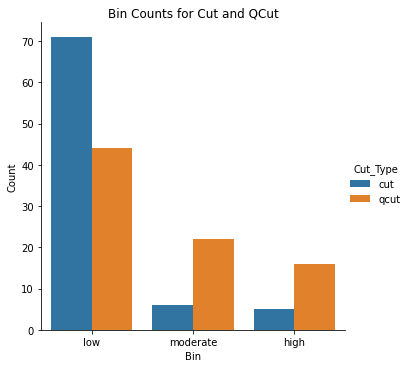

In [30]:
sns.catplot(x = 'Bin', y='Count',
               hue = 'Cut_Type',data=df, kind='bar')
plt.title("Bin Counts for Cut and QCut")
plt.show()


## Part (e)

### 5 points


Write a method called `standardize` that takes in a data frame and a list of columns. The method should create and return a data frame that contains only the numeric columns from the given data frame that are provided in the columns list, but in a standardized form. (You may find it easiest to start with an initially empty data frame and add columns to it.) This standardized form is called a "z-score" and can be computed as follows:

$$
z = \frac{x-\bar{x}}{s}
$$

where $x$ is the original value, $\bar{x}$ is the mean of the values in that column, and $s$ is the standard deviation of values in that column.

Call `standardize` by giving it the `cereals_data3` data frame and the columns `Carbo`, `Sugars`, `Potass`, `Vit`, and `Name`. (`Name` is not a numeric column, so it should not show up in the resulting data frame, nor should it cause an error.)



In [31]:
def standardize(df, lst):
    """This Method takes in a dataframe and  alist of columns. It creates and returns a data frame that contains only the numeric
    columns from the given dataframe that are provided in the columns list. But in a standardized form."""
    for column in lst:
        if is_numeric_dtype(cereals_data3[column]) == True:
            df[column] = (df[column] - df[column].mean()) / df[column].std()
        else:
            df.drop(columns=column, inplace=True, axis=1)
    return df

cols = ['Carbo', 'Sugars', 'Potass', 'Vit', 'Name']
z_scores = standardize(cereals_data3[cols].copy(), cols)
z_scores

,Carbo,Sugars,Potass,Vit
0,-2.526295,-0.231302,2.582194,-1.065107e-01
1,-1.742442,0.231302,0.494846,-1.704172e+00
2,-2.003726,-0.462604,3.158015,-1.065107e-01
3,-1.742442,-1.619115,3.301970,-1.065107e-01
4,-0.174734,0.231302,0.000000,-1.065107e-01
...,...,...,...,...
77,1.654258,-0.925208,-0.584818,-2.270413e-16
78,-0.436019,1.156510,-1.088660,-2.270413e-16
79,0.609120,-0.925208,0.206935,-2.270413e-16
80,0.609120,-0.925208,0.134958,-2.270413e-16


Using this standardized data frame, check for outliers by finding any values that are greater than 3. Output for a each column a count of the number of outliers in that column.

In [32]:
z_scores[z_scores > 3].count()

Carbo     0
Sugars    0
Potass    2
Vit       3
dtype: int64

# Question 4 - Data Aggregation
### All parts in the question will use cereals_data3 as the data frame to analyze.

## Part (a)

### 3 points



Group the data based on manufacturer and name using `groupby` and compute the mean for the columns `Cal`, `Fat`, `Sodium`, `Fiber`, and `Sugars`.

In [33]:
cereals_data3.groupby(['Manuf'])[['Cal', 'Fat', 'Sodium', 'Fiber', 'Sugars']].mean()

,Cal,Fat,Sodium,Fiber,Sugars
Manuf,,,,,
A,100.000000,1.000000,0.000000,0.000000,3.000000
G,111.333333,1.533333,202.000000,1.133333,8.600000
G,107.166667,1.125000,190.000000,1.687500,6.750000
K,109.473684,0.684211,180.526316,3.105263,7.736842
K,107.166667,0.400000,160.000000,1.800000,7.800000
N,85.000000,0.500000,105.000000,5.500000,3.000000
N,107.166667,0.000000,3.750000,3.250000,1.250000
P,108.888889,0.888889,146.111111,2.777778,8.777778
Q,95.000000,1.750000,92.500000,1.337500,6.250000


Produce the same table as the above GroupBy example, but using `pivot_table` instead.

In [34]:
pd.pivot_table(cereals_data3, index=['Manuf'], values=['Cal', 'Fat', 'Sodium', 'Fiber', 'Sugars'], aggfunc={'Cal': np.mean,
                                                                                                            'Fat': np.mean,
                                                                                                            'Sodium': np.mean,
                                                                                                            'Fiber': np.mean,
                                                                                                            'Sugars': np.mean})

,Cal,Fat,Fiber,Sodium,Sugars
Manuf,,,,,
A,100.000000,1.000000,0.000000,0.000000,3.000000
G,111.333333,1.533333,1.133333,202.000000,8.600000
G,107.166667,1.125000,1.687500,190.000000,6.750000
K,109.473684,0.684211,3.105263,180.526316,7.736842
K,107.166667,0.400000,1.800000,160.000000,7.800000
N,85.000000,0.500000,5.500000,105.000000,3.000000
N,107.166667,0.000000,3.250000,3.750000,1.250000
P,108.888889,0.888889,2.777778,146.111111,8.777778
Q,95.000000,1.750000,1.337500,92.500000,6.250000


Use the `agg` method to compute the min, mean, and max of the columns `Cal`, `Carbo`, and `Sugars`.

In [35]:
cereals_data3.agg(['mean', 'min', 'max'])[['Cal', 'Carbo', 'Sugars']]

,Cal,Carbo,Sugars
mean,107.166667,14.66875,7.0
min,50.000000,5.00000,0.0
max,160.000000,23.00000,15.0


## Part (b)

### 3 points


Create a cross tabulation between `Manuf` and `Shelf` using raw frequencies. (If you properly removed whitespace after reading in `more_cereals_data.csv` in Question 3, you should not see any duplicate values for `Manuf` here.)

In [36]:
ct = pd.crosstab(more_cereals_data.Manuf, more_cereals_data.Shelf)
ct

Shelf,1,2,3
Manuf,,,
G,2,1,5
K,2,2,1
N,3,1,0
Q,1,0,2
R,2,0,0


Using the above crosstab, determine what percentage of cereals on shelf 2 are made by manufacturer 'K'. Your code should compute and output this value as a floating point number.

In [37]:
k2 = ct.iloc[1][2] / ct[2].sum()
print(type(k2))
k2

<class 'numpy.float64'>


0.5

# Question 5 - Data Visualization

## Part (a)

### 4 points


Create a `plt` figure and set its size in inches (use `set_size_inches`) to 12x8. Add six subplots to this figure, arranged in a 2x3 grid. The x-values for each subplot should come from `Protein`, `Fat`, `Sodium`, `Fiber`, `Carbo`, and `Sugars` respectively. The y-values for all subplots should be the values for `Cal`. Set the x-label (use `set_xlabel`) for each subplot to be its respective column name.

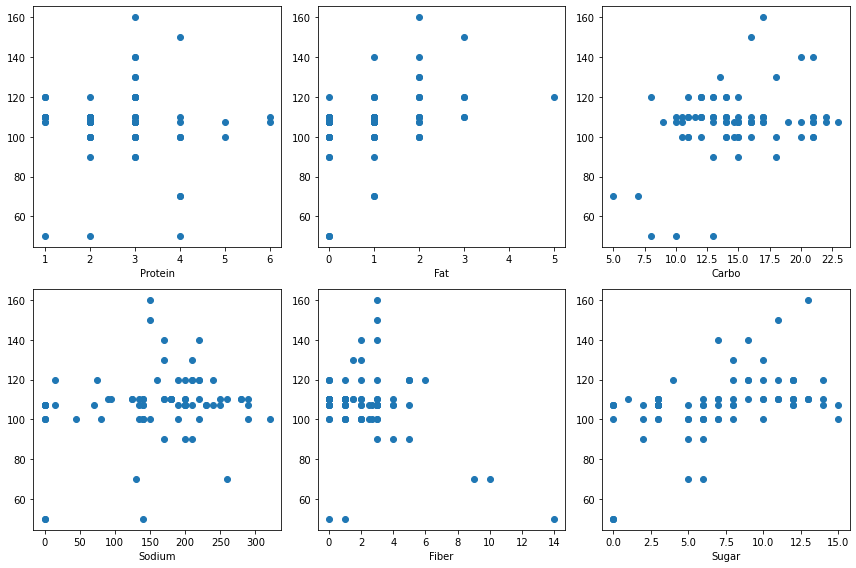

In [38]:
fig, ax = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches(12,8)
ax[0,0].scatter(cereals_data3['Protein'], cereals_data3['Cal'])
ax[0,0].set_xlabel("Protein")

ax[0,1].scatter(cereals_data3['Fat'], cereals_data3['Cal'])
ax[0,1].set_xlabel("Fat")

ax[1,0].scatter(cereals_data3['Sodium'], cereals_data3['Cal'])
ax[1,0].set_xlabel("Sodium")

ax[1,1].scatter(cereals_data3['Fiber'], cereals_data3['Cal'])
ax[1,1].set_xlabel("Fiber")

ax[0,2].scatter(cereals_data3['Carbo'], cereals_data3['Cal'])
ax[0,2].set_xlabel("Carbo")

ax[1,2].scatter(cereals_data3['Sugars'], cereals_data3['Cal'])
ax[1,2].set_xlabel("Sugar")

fig.tight_layout()

## Part (b)

### 4 points


Use Seaborn to create a scatterplot using `Carbo` vs `Sugars`. Change the hue of the data points based on `Shelf` so that each shelf (1, 2, and 3) has its own color represented in the plot.

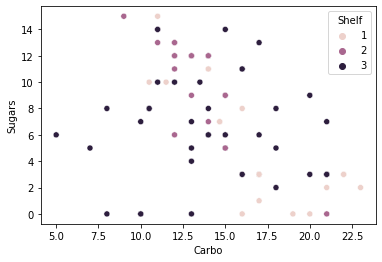

In [39]:
Sea = sns.scatterplot(data=cereals_data3, x='Carbo', y='Sugars', hue='Shelf')

Get a list of the unique manufacturers in the data. Create a figure and axes using `subplots` that is 1x7 (for the 7 manufacturers). Set the figure to 2x14 inches.

For each manufacturer, use Seaborn to create a scatterplot displaying `Carbo` vs `Sugars` for each subplot based on each manufacturer. (You can pass an AxesSubplot object to a Seaborn scatterplot using the `ax` parameter.) You should have 7 subplots, each corresponding to a particular manufacturer displaying the correlation between `Carbo` and `Sugar` for that manufacturer's cereal.

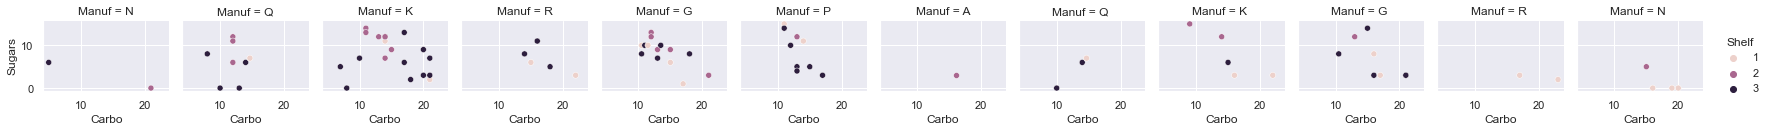

In [42]:
sns.set(rc={'figure.figsize':(2,14)})
sns.relplot(data=cereals_data3, x='Carbo', y='Sugars', col='Manuf', hue='Shelf', kind='scatter', height=2,aspect=1)
